In [1]:
import warnings
import pandas as pd
from prophet import Prophet
from prophet.diagnostics import cross_validation, performance_metrics
from bayes_opt import BayesianOptimization
import itertools
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
=import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [24]:
# Load data
df = pd.read_csv('google-data.csv')
df = df[['Date', 'Close']]
df.rename(columns={'Date': 'ds', 'Close': 'y'}, inplace=True)

In [25]:
def prophet_optimization(changepoint_prior_scale, seasonality_prior_scale, holidays_prior_scale):
    m = Prophet(
        changepoint_prior_scale=changepoint_prior_scale,
        seasonality_prior_scale=seasonality_prior_scale,
        holidays_prior_scale=holidays_prior_scale,
        daily_seasonality=False,
        weekly_seasonality=True,
        yearly_seasonality=True
    )
    m.fit(df)
    df_cv = cross_validation(m, initial='730 days', period='180 days', horizon='365 days')
    df_p = performance_metrics(df_cv)
    mape = df_p['mape'].mean()
    return -mape  # maximize the negative MAPE

# Bayesian Optimization setup
params = {
    'changepoint_prior_scale': (0.001, 0.5),
    'seasonality_prior_scale': (1.0, 10.0),
    'holidays_prior_scale': (0.01, 10.0),
}

optimizer = BayesianOptimization(
    f=prophet_optimization,
    pbounds=params,
    random_state=1
)

optimizer.maximize(init_points=10, n_iter=50)


DEBUG:cmdstanpy:input tempfile: /tmp/tmp4jsek5g2/3zgng1jp.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4jsek5g2/dm5nlgg5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=53316', 'data', 'file=/tmp/tmp4jsek5g2/3zgng1jp.json', 'init=/tmp/tmp4jsek5g2/dm5nlgg5.json', 'output', 'file=/tmp/tmp4jsek5g2/prophet_modelmn10n8u3/prophet_model-20240423174709.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:47:09 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


|   iter    |  target   | change... | holida... | season... |
-------------------------------------------------------------


17:47:10 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 5 forecasts with cutoffs between 2015-01-09 00:00:00 and 2016-12-29 00:00:00


  0%|          | 0/5 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmp4jsek5g2/9eks4bty.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4jsek5g2/x8e9o2_m.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=33810', 'data', 'file=/tmp/tmp4jsek5g2/9eks4bty.json', 'init=/tmp/tmp4jsek5g2/x8e9o2_m.json', 'output', 'file=/tmp/tmp4jsek5g2/prophet_modeln4xbnrup/prophet_model-20240423174710.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:47:10 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:47:10 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4jsek5g2/5z20fxph.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4jsek5g2/jk7zcfls.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

| 1         | -0.2112   | 0.2091    | 7.206     | 1.001     |


17:47:16 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 5 forecasts with cutoffs between 2015-01-09 00:00:00 and 2016-12-29 00:00:00


  0%|          | 0/5 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmp4jsek5g2/ccvjqsz_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4jsek5g2/y4wfqq3n.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=69136', 'data', 'file=/tmp/tmp4jsek5g2/ccvjqsz_.json', 'init=/tmp/tmp4jsek5g2/y4wfqq3n.json', 'output', 'file=/tmp/tmp4jsek5g2/prophet_modeltkd_tkav/prophet_model-20240423174716.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:47:16 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:47:16 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4jsek5g2/9r0w41mt.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4jsek5g2/spal_93k.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

| 2         | -0.2176   | 0.1519    | 1.476     | 1.831     |


17:47:20 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 5 forecasts with cutoffs between 2015-01-09 00:00:00 and 2016-12-29 00:00:00


  0%|          | 0/5 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmp4jsek5g2/xo9pbyhy.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4jsek5g2/iyauca25.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=23715', 'data', 'file=/tmp/tmp4jsek5g2/xo9pbyhy.json', 'init=/tmp/tmp4jsek5g2/iyauca25.json', 'output', 'file=/tmp/tmp4jsek5g2/prophet_model6nw3fvgu/prophet_model-20240423174720.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:47:20 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:47:21 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4jsek5g2/29dwhxoh.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4jsek5g2/uylisp_t.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

| 3         | -0.2293   | 0.09394   | 3.462     | 4.571     |


17:47:24 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 5 forecasts with cutoffs between 2015-01-09 00:00:00 and 2016-12-29 00:00:00


  0%|          | 0/5 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmp4jsek5g2/4nk_f74l.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4jsek5g2/v1jf3grw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=93816', 'data', 'file=/tmp/tmp4jsek5g2/4nk_f74l.json', 'init=/tmp/tmp4jsek5g2/v1jf3grw.json', 'output', 'file=/tmp/tmp4jsek5g2/prophet_modelmgd23g_k/prophet_model-20240423174725.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:47:25 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:47:25 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4jsek5g2/1ml8k6nl.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4jsek5g2/2r1kbuae.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

| 4         | -0.2074   | 0.2699    | 4.198     | 7.167     |


17:47:30 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 5 forecasts with cutoffs between 2015-01-09 00:00:00 and 2016-12-29 00:00:00


  0%|          | 0/5 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmp4jsek5g2/m7bs510l.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4jsek5g2/tbgoa2nw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=65811', 'data', 'file=/tmp/tmp4jsek5g2/m7bs510l.json', 'init=/tmp/tmp4jsek5g2/tbgoa2nw.json', 'output', 'file=/tmp/tmp4jsek5g2/prophet_modelzdm3bxup/prophet_model-20240423174730.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:47:30 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:47:30 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4jsek5g2/k2uxc69b.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4jsek5g2/hza360z5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

| 5         | -0.2295   | 0.103     | 8.782     | 1.246     |


17:47:34 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 5 forecasts with cutoffs between 2015-01-09 00:00:00 and 2016-12-29 00:00:00


  0%|          | 0/5 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmp4jsek5g2/c79sru4y.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4jsek5g2/p8_bvpu7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=30914', 'data', 'file=/tmp/tmp4jsek5g2/c79sru4y.json', 'init=/tmp/tmp4jsek5g2/p8_bvpu7.json', 'output', 'file=/tmp/tmp4jsek5g2/prophet_model7253pymw/prophet_model-20240423174734.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:47:34 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:47:34 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4jsek5g2/2vgbia30.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4jsek5g2/lfb0t0_g.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

| 6         | -0.206    | 0.3356    | 4.179     | 6.028     |


DEBUG:cmdstanpy:input tempfile: /tmp/tmp4jsek5g2/xtg_3bqf.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=72658', 'data', 'file=/tmp/tmp4jsek5g2/0q4okmgy.json', 'init=/tmp/tmp4jsek5g2/xtg_3bqf.json', 'output', 'file=/tmp/tmp4jsek5g2/prophet_model1668ytn8/prophet_model-20240423174739.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:47:39 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:47:40 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 5 forecasts with cutoffs between 2015-01-09 00:00:00 and 2016-12-29 00:00:00


  0%|          | 0/5 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmp4jsek5g2/m83anw8x.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4jsek5g2/frvswr79.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=98795', 'data', 'file=/tmp/tmp4jsek5g2/m83anw8x.json', 'init=/tmp/tmp4jsek5g2/frvswr79.json', 'output', 'file=/tmp/tmp4jsek5g2/prophet_modelj4y3e2_2/prophet_model-20240423174740.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:47:40 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:47:40 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4jsek5g2/bwuvv75a.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4jsek5g2/emem8s4d.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

| 7         | -0.2343   | 0.07105   | 1.989     | 8.207     |


17:47:43 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 5 forecasts with cutoffs between 2015-01-09 00:00:00 and 2016-12-29 00:00:00


  0%|          | 0/5 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmp4jsek5g2/qvrtc7f1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4jsek5g2/ark842i6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=78340', 'data', 'file=/tmp/tmp4jsek5g2/qvrtc7f1.json', 'init=/tmp/tmp4jsek5g2/ark842i6.json', 'output', 'file=/tmp/tmp4jsek5g2/prophet_modelz8zk_0wq/prophet_model-20240423174743.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:47:43 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:47:44 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4jsek5g2/f_yndqh8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4jsek5g2/xitjmpmn.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

| 8         | -0.199    | 0.4842    | 3.141     | 7.231     |


17:47:48 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 5 forecasts with cutoffs between 2015-01-09 00:00:00 and 2016-12-29 00:00:00


  0%|          | 0/5 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmp4jsek5g2/1jj7pi9q.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4jsek5g2/s2sjgyaa.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=4816', 'data', 'file=/tmp/tmp4jsek5g2/1jj7pi9q.json', 'init=/tmp/tmp4jsek5g2/s2sjgyaa.json', 'output', 'file=/tmp/tmp4jsek5g2/prophet_modelzl6xehjf/prophet_model-20240423174749.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:47:49 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:47:49 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4jsek5g2/xynn9b0g.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4jsek5g2/68d1mnbd.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/l

| 9         | -0.2049   | 0.4383    | 8.947     | 1.765     |


17:47:54 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 5 forecasts with cutoffs between 2015-01-09 00:00:00 and 2016-12-29 00:00:00


  0%|          | 0/5 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmp4jsek5g2/rc8i7uac.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4jsek5g2/xwm7e2b1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=47379', 'data', 'file=/tmp/tmp4jsek5g2/rc8i7uac.json', 'init=/tmp/tmp4jsek5g2/xwm7e2b1.json', 'output', 'file=/tmp/tmp4jsek5g2/prophet_modeltjs8cd78/prophet_model-20240423174754.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:47:54 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:47:54 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4jsek5g2/pr724dez.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4jsek5g2/xehka1v_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

| 10        | -0.2116   | 0.02049   | 1.707     | 8.903     |


DEBUG:cmdstanpy:input tempfile: /tmp/tmp4jsek5g2/2wgvam3p.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=4108', 'data', 'file=/tmp/tmp4jsek5g2/ogcpy7at.json', 'init=/tmp/tmp4jsek5g2/2wgvam3p.json', 'output', 'file=/tmp/tmp4jsek5g2/prophet_modelsnsn6gs2/prophet_model-20240423174756.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:47:56 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:47:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 5 forecasts with cutoffs between 2015-01-09 00:00:00 and 2016-12-29 00:00:00


  0%|          | 0/5 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmp4jsek5g2/25mdue6h.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4jsek5g2/m8m458t5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=19730', 'data', 'file=/tmp/tmp4jsek5g2/25mdue6h.json', 'init=/tmp/tmp4jsek5g2/m8m458t5.json', 'output', 'file=/tmp/tmp4jsek5g2/prophet_model1cx7vbr_/prophet_model-20240423174757.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:47:57 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:47:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4jsek5g2/cninykk6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4jsek5g2/5hux6u4r.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

| 11        | -0.2135   | 0.1885    | 7.901     | 7.97      |


DEBUG:cmdstanpy:input tempfile: /tmp/tmp4jsek5g2/3s81o81a.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=57186', 'data', 'file=/tmp/tmp4jsek5g2/bporx8hg.json', 'init=/tmp/tmp4jsek5g2/3s81o81a.json', 'output', 'file=/tmp/tmp4jsek5g2/prophet_modelsvk0sawz/prophet_model-20240423174801.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:48:01 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:48:02 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 5 forecasts with cutoffs between 2015-01-09 00:00:00 and 2016-12-29 00:00:00


  0%|          | 0/5 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmp4jsek5g2/kiyle4p_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4jsek5g2/weruqxrb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=55439', 'data', 'file=/tmp/tmp4jsek5g2/kiyle4p_.json', 'init=/tmp/tmp4jsek5g2/weruqxrb.json', 'output', 'file=/tmp/tmp4jsek5g2/prophet_modellm1lf57j/prophet_model-20240423174802.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:48:02 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:48:03 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4jsek5g2/bm2uptat.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4jsek5g2/y7r6ekel.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

| 12        | -0.2066   | 0.2666    | 7.876     | 2.574     |


DEBUG:cmdstanpy:input tempfile: /tmp/tmp4jsek5g2/cfz34tbg.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=30521', 'data', 'file=/tmp/tmp4jsek5g2/c29il1_k.json', 'init=/tmp/tmp4jsek5g2/cfz34tbg.json', 'output', 'file=/tmp/tmp4jsek5g2/prophet_modelzx9iytez/prophet_model-20240423174807.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:48:07 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:48:08 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 5 forecasts with cutoffs between 2015-01-09 00:00:00 and 2016-12-29 00:00:00


  0%|          | 0/5 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmp4jsek5g2/epui_o3p.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4jsek5g2/m2y059ky.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=79055', 'data', 'file=/tmp/tmp4jsek5g2/epui_o3p.json', 'init=/tmp/tmp4jsek5g2/m2y059ky.json', 'output', 'file=/tmp/tmp4jsek5g2/prophet_modell5oj0lk0/prophet_model-20240423174808.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:48:08 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:48:08 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4jsek5g2/bmy3mpnw.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4jsek5g2/xfn0ovr9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

| 13        | -0.2067   | 0.2983    | 2.618     | 7.721     |


DEBUG:cmdstanpy:input tempfile: /tmp/tmp4jsek5g2/yz0lx3yt.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=10303', 'data', 'file=/tmp/tmp4jsek5g2/dhixo6_5.json', 'init=/tmp/tmp4jsek5g2/yz0lx3yt.json', 'output', 'file=/tmp/tmp4jsek5g2/prophet_model8qjb44jt/prophet_model-20240423174812.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:48:12 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:48:13 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 5 forecasts with cutoffs between 2015-01-09 00:00:00 and 2016-12-29 00:00:00


  0%|          | 0/5 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmp4jsek5g2/47r1kry6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4jsek5g2/0rglnqet.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=14980', 'data', 'file=/tmp/tmp4jsek5g2/47r1kry6.json', 'init=/tmp/tmp4jsek5g2/0rglnqet.json', 'output', 'file=/tmp/tmp4jsek5g2/prophet_modelkdx4zetm/prophet_model-20240423174813.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:48:13 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:48:13 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4jsek5g2/yzbj1wv6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4jsek5g2/m9734d4b.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

| 14        | -0.2249   | 0.1145    | 1.564     | 9.526     |


DEBUG:cmdstanpy:input tempfile: /tmp/tmp4jsek5g2/f8or_jaf.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=79311', 'data', 'file=/tmp/tmp4jsek5g2/0gcy5wpi.json', 'init=/tmp/tmp4jsek5g2/f8or_jaf.json', 'output', 'file=/tmp/tmp4jsek5g2/prophet_model3smhc2s8/prophet_model-20240423174817.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:48:17 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:48:18 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 5 forecasts with cutoffs between 2015-01-09 00:00:00 and 2016-12-29 00:00:00


  0%|          | 0/5 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmp4jsek5g2/5ixbnd2i.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4jsek5g2/2htr48fr.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=62051', 'data', 'file=/tmp/tmp4jsek5g2/5ixbnd2i.json', 'init=/tmp/tmp4jsek5g2/2htr48fr.json', 'output', 'file=/tmp/tmp4jsek5g2/prophet_model2lvysjfa/prophet_model-20240423174818.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:48:18 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:48:18 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4jsek5g2/llljpsmn.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4jsek5g2/pncllsac.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

| 15        | -0.2032   | 0.3634    | 7.289     | 2.752     |


DEBUG:cmdstanpy:input tempfile: /tmp/tmp4jsek5g2/srzy_5h4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=49098', 'data', 'file=/tmp/tmp4jsek5g2/z5h6id37.json', 'init=/tmp/tmp4jsek5g2/srzy_5h4.json', 'output', 'file=/tmp/tmp4jsek5g2/prophet_modelsn_jfi7p/prophet_model-20240423174822.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:48:22 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:48:23 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 5 forecasts with cutoffs between 2015-01-09 00:00:00 and 2016-12-29 00:00:00


  0%|          | 0/5 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmp4jsek5g2/7quk7rfy.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4jsek5g2/gtyyjpke.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=68315', 'data', 'file=/tmp/tmp4jsek5g2/7quk7rfy.json', 'init=/tmp/tmp4jsek5g2/gtyyjpke.json', 'output', 'file=/tmp/tmp4jsek5g2/prophet_model81y1470w/prophet_model-20240423174823.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:48:23 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:48:23 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4jsek5g2/0oaobf9m.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4jsek5g2/kn6v8356.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

| 16        | -0.2108   | 0.2357    | 4.241     | 5.247     |


DEBUG:cmdstanpy:input tempfile: /tmp/tmp4jsek5g2/8wobl85s.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=22605', 'data', 'file=/tmp/tmp4jsek5g2/76ke65kq.json', 'init=/tmp/tmp4jsek5g2/8wobl85s.json', 'output', 'file=/tmp/tmp4jsek5g2/prophet_model8104vigp/prophet_model-20240423174827.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:48:27 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:48:29 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 5 forecasts with cutoffs between 2015-01-09 00:00:00 and 2016-12-29 00:00:00


  0%|          | 0/5 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmp4jsek5g2/4l2mvoas.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4jsek5g2/sudukk4v.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=72322', 'data', 'file=/tmp/tmp4jsek5g2/4l2mvoas.json', 'init=/tmp/tmp4jsek5g2/sudukk4v.json', 'output', 'file=/tmp/tmp4jsek5g2/prophet_model6mjo7592/prophet_model-20240423174829.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:48:29 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:48:29 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4jsek5g2/5xeud6wf.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4jsek5g2/va7bn8f0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

| 17        | -0.1984   | 0.4778    | 6.644     | 5.236     |


DEBUG:cmdstanpy:input tempfile: /tmp/tmp4jsek5g2/miwhtqrw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=4897', 'data', 'file=/tmp/tmp4jsek5g2/ys99546w.json', 'init=/tmp/tmp4jsek5g2/miwhtqrw.json', 'output', 'file=/tmp/tmp4jsek5g2/prophet_modelce1fu91y/prophet_model-20240423174833.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:48:33 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:48:34 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 5 forecasts with cutoffs between 2015-01-09 00:00:00 and 2016-12-29 00:00:00


  0%|          | 0/5 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmp4jsek5g2/9gdwg3a1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4jsek5g2/yh14gkfu.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=24855', 'data', 'file=/tmp/tmp4jsek5g2/9gdwg3a1.json', 'init=/tmp/tmp4jsek5g2/yh14gkfu.json', 'output', 'file=/tmp/tmp4jsek5g2/prophet_modelguyqyo8o/prophet_model-20240423174834.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:48:34 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:48:35 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4jsek5g2/1s4a3yqg.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4jsek5g2/2cd33j0k.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

| 18        | -0.2049   | 0.2449    | 8.413     | 9.812     |


DEBUG:cmdstanpy:input tempfile: /tmp/tmp4jsek5g2/j2k03edh.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=87094', 'data', 'file=/tmp/tmp4jsek5g2/tx2wfs3_.json', 'init=/tmp/tmp4jsek5g2/j2k03edh.json', 'output', 'file=/tmp/tmp4jsek5g2/prophet_modela60333ij/prophet_model-20240423174838.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:48:38 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:48:39 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 5 forecasts with cutoffs between 2015-01-09 00:00:00 and 2016-12-29 00:00:00


  0%|          | 0/5 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmp4jsek5g2/l9s63lck.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4jsek5g2/waz75ttx.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=93905', 'data', 'file=/tmp/tmp4jsek5g2/l9s63lck.json', 'init=/tmp/tmp4jsek5g2/waz75ttx.json', 'output', 'file=/tmp/tmp4jsek5g2/prophet_model1mo1sota/prophet_model-20240423174839.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:48:39 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:48:39 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4jsek5g2/_vpyk71p.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4jsek5g2/bu_vong8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

| 19        | -0.2189   | 0.1619    | 7.638     | 8.713     |


DEBUG:cmdstanpy:input tempfile: /tmp/tmp4jsek5g2/0idl9d61.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=94190', 'data', 'file=/tmp/tmp4jsek5g2/ukhekl3d.json', 'init=/tmp/tmp4jsek5g2/0idl9d61.json', 'output', 'file=/tmp/tmp4jsek5g2/prophet_modely2ed6eug/prophet_model-20240423174843.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:48:43 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:48:44 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 5 forecasts with cutoffs between 2015-01-09 00:00:00 and 2016-12-29 00:00:00


  0%|          | 0/5 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmp4jsek5g2/kowxiwjk.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4jsek5g2/d8f7efzi.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=17585', 'data', 'file=/tmp/tmp4jsek5g2/kowxiwjk.json', 'init=/tmp/tmp4jsek5g2/d8f7efzi.json', 'output', 'file=/tmp/tmp4jsek5g2/prophet_modeltb0baqvn/prophet_model-20240423174844.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:48:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:48:45 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4jsek5g2/nv6nypwz.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4jsek5g2/5npwq_5_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

| 20        | -0.198    | 0.4276    | 7.196     | 9.208     |


DEBUG:cmdstanpy:input tempfile: /tmp/tmp4jsek5g2/6grmxpik.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=38945', 'data', 'file=/tmp/tmp4jsek5g2/gm1w8436.json', 'init=/tmp/tmp4jsek5g2/6grmxpik.json', 'output', 'file=/tmp/tmp4jsek5g2/prophet_model7ik8il5u/prophet_model-20240423174849.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:48:49 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:48:50 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 5 forecasts with cutoffs between 2015-01-09 00:00:00 and 2016-12-29 00:00:00


  0%|          | 0/5 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmp4jsek5g2/x9knowf_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4jsek5g2/_1bbun4h.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=92984', 'data', 'file=/tmp/tmp4jsek5g2/x9knowf_.json', 'init=/tmp/tmp4jsek5g2/_1bbun4h.json', 'output', 'file=/tmp/tmp4jsek5g2/prophet_model679stzct/prophet_model-20240423174850.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:48:50 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:48:51 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4jsek5g2/qj5keyx6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4jsek5g2/n4wuyaoj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

| 21        | -0.2023   | 0.3389    | 5.484     | 4.449     |


DEBUG:cmdstanpy:input tempfile: /tmp/tmp4jsek5g2/8j293i8h.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=94468', 'data', 'file=/tmp/tmp4jsek5g2/xxgn9gts.json', 'init=/tmp/tmp4jsek5g2/8j293i8h.json', 'output', 'file=/tmp/tmp4jsek5g2/prophet_model2ut3hd_p/prophet_model-20240423174856.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:48:56 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:48:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 5 forecasts with cutoffs between 2015-01-09 00:00:00 and 2016-12-29 00:00:00


  0%|          | 0/5 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmp4jsek5g2/c91yhjpj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4jsek5g2/htl57gd5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=15461', 'data', 'file=/tmp/tmp4jsek5g2/c91yhjpj.json', 'init=/tmp/tmp4jsek5g2/htl57gd5.json', 'output', 'file=/tmp/tmp4jsek5g2/prophet_modelrpeih_9w/prophet_model-20240423174857.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:48:57 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:48:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4jsek5g2/2f_ofvto.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4jsek5g2/3mpi7drh.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

| 22        | -0.233    | 0.07124   | 1.402     | 3.851     |


DEBUG:cmdstanpy:input tempfile: /tmp/tmp4jsek5g2/27svhw3k.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=72540', 'data', 'file=/tmp/tmp4jsek5g2/6vzkcivz.json', 'init=/tmp/tmp4jsek5g2/27svhw3k.json', 'output', 'file=/tmp/tmp4jsek5g2/prophet_modelfh_zx7zl/prophet_model-20240423174900.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:49:00 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:49:01 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 5 forecasts with cutoffs between 2015-01-09 00:00:00 and 2016-12-29 00:00:00


  0%|          | 0/5 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmp4jsek5g2/esm1gqam.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4jsek5g2/9nfnkobz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=59474', 'data', 'file=/tmp/tmp4jsek5g2/esm1gqam.json', 'init=/tmp/tmp4jsek5g2/9nfnkobz.json', 'output', 'file=/tmp/tmp4jsek5g2/prophet_modelmp8ckt3h/prophet_model-20240423174902.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:49:02 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:49:02 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4jsek5g2/_73sc8k_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4jsek5g2/cn1phc4d.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

| 23        | -0.2217   | 0.1377    | 7.646     | 1.602     |


DEBUG:cmdstanpy:input tempfile: /tmp/tmp4jsek5g2/lgi0e4bq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=25958', 'data', 'file=/tmp/tmp4jsek5g2/gktcvcyt.json', 'init=/tmp/tmp4jsek5g2/lgi0e4bq.json', 'output', 'file=/tmp/tmp4jsek5g2/prophet_modeljug6rmdl/prophet_model-20240423174906.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:49:06 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:49:07 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 5 forecasts with cutoffs between 2015-01-09 00:00:00 and 2016-12-29 00:00:00


  0%|          | 0/5 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmp4jsek5g2/9e279uey.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4jsek5g2/ns7ma0bq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=94348', 'data', 'file=/tmp/tmp4jsek5g2/9e279uey.json', 'init=/tmp/tmp4jsek5g2/ns7ma0bq.json', 'output', 'file=/tmp/tmp4jsek5g2/prophet_model6gul9qhu/prophet_model-20240423174907.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:49:07 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:49:08 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4jsek5g2/57n5d5_6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4jsek5g2/dd4d3qfk.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

| 24        | -0.2027   | 0.4697    | 9.5       | 3.512     |


DEBUG:cmdstanpy:input tempfile: /tmp/tmp4jsek5g2/46aoudrx.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=49558', 'data', 'file=/tmp/tmp4jsek5g2/tl13ob1w.json', 'init=/tmp/tmp4jsek5g2/46aoudrx.json', 'output', 'file=/tmp/tmp4jsek5g2/prophet_model93vrhjof/prophet_model-20240423174911.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:49:11 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:49:12 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 5 forecasts with cutoffs between 2015-01-09 00:00:00 and 2016-12-29 00:00:00


  0%|          | 0/5 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmp4jsek5g2/r8_x0gqh.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4jsek5g2/y3322z2l.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=73025', 'data', 'file=/tmp/tmp4jsek5g2/r8_x0gqh.json', 'init=/tmp/tmp4jsek5g2/y3322z2l.json', 'output', 'file=/tmp/tmp4jsek5g2/prophet_modeldo6cfegj/prophet_model-20240423174912.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:49:12 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:49:13 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4jsek5g2/huw5kv63.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4jsek5g2/y58wkz9f.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

| 25        | -0.2068   | 0.2995    | 1.136     | 2.051     |


DEBUG:cmdstanpy:input tempfile: /tmp/tmp4jsek5g2/xctbtc4c.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=80794', 'data', 'file=/tmp/tmp4jsek5g2/tdjp3tfm.json', 'init=/tmp/tmp4jsek5g2/xctbtc4c.json', 'output', 'file=/tmp/tmp4jsek5g2/prophet_modelwsnvew9d/prophet_model-20240423174917.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:49:17 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:49:19 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 5 forecasts with cutoffs between 2015-01-09 00:00:00 and 2016-12-29 00:00:00


  0%|          | 0/5 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmp4jsek5g2/jarm81qt.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4jsek5g2/eesrt9_4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=8526', 'data', 'file=/tmp/tmp4jsek5g2/jarm81qt.json', 'init=/tmp/tmp4jsek5g2/eesrt9_4.json', 'output', 'file=/tmp/tmp4jsek5g2/prophet_modelhwsj5uwo/prophet_model-20240423174920.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:49:20 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:49:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4jsek5g2/9x0d8vtv.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4jsek5g2/1qu3vavd.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/l

| 26        | -0.2052   | 0.3072    | 5.578     | 6.882     |


DEBUG:cmdstanpy:input tempfile: /tmp/tmp4jsek5g2/7bydn7tn.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4jsek5g2/25uus4h4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=49897', 'data', 'file=/tmp/tmp4jsek5g2/7bydn7tn.json', 'init=/tmp/tmp4jsek5g2/25uus4h4.json', 'output', 'file=/tmp/tmp4jsek5g2/prophet_modelhbh5nkee/prophet_model-20240423174931.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:49:31 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:49:31 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 5 forecasts with cutoffs between 2015-01-09 00:00:00 and 2016-12-29 00:00:00


  0%|          | 0/5 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmp4jsek5g2/tfbs_4c2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4jsek5g2/51qwtlob.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=58972', 'data', 'file=/tmp/tmp4jsek5g2/tfbs_4c2.json', 'init=/tmp/tmp4jsek5g2/51qwtlob.json', 'output', 'file=/tmp/tmp4jsek5g2/prophet_modelcuw8dij2/prophet_model-20240423174932.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:49:32 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:49:32 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4jsek5g2/ajbvdbq4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4jsek5g2/sdioo501.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

| 27        | -0.164    | 0.00939   | 2.591     | 8.205     |


DEBUG:cmdstanpy:input tempfile: /tmp/tmp4jsek5g2/app45xoj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=97195', 'data', 'file=/tmp/tmp4jsek5g2/973iiw4f.json', 'init=/tmp/tmp4jsek5g2/app45xoj.json', 'output', 'file=/tmp/tmp4jsek5g2/prophet_modelx32722ox/prophet_model-20240423174937.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:49:37 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:49:38 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 5 forecasts with cutoffs between 2015-01-09 00:00:00 and 2016-12-29 00:00:00


  0%|          | 0/5 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmp4jsek5g2/fzdt0gtw.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4jsek5g2/ui81nm_3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=58485', 'data', 'file=/tmp/tmp4jsek5g2/fzdt0gtw.json', 'init=/tmp/tmp4jsek5g2/ui81nm_3.json', 'output', 'file=/tmp/tmp4jsek5g2/prophet_modelaubo7p6j/prophet_model-20240423174939.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:49:39 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:49:39 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4jsek5g2/ahrnowgd.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4jsek5g2/d4wl7592.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

| 28        | -0.2163   | 0.1569    | 5.467     | 8.441     |


DEBUG:cmdstanpy:input tempfile: /tmp/tmp4jsek5g2/dd4ov8ov.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=4595', 'data', 'file=/tmp/tmp4jsek5g2/agvfaxw0.json', 'init=/tmp/tmp4jsek5g2/dd4ov8ov.json', 'output', 'file=/tmp/tmp4jsek5g2/prophet_model_7tyawi1/prophet_model-20240423174943.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:49:43 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:49:43 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 5 forecasts with cutoffs between 2015-01-09 00:00:00 and 2016-12-29 00:00:00


  0%|          | 0/5 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmp4jsek5g2/wu4e973j.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4jsek5g2/_pmje1rl.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=54715', 'data', 'file=/tmp/tmp4jsek5g2/wu4e973j.json', 'init=/tmp/tmp4jsek5g2/_pmje1rl.json', 'output', 'file=/tmp/tmp4jsek5g2/prophet_model59t0xxhq/prophet_model-20240423174943.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:49:43 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:49:44 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4jsek5g2/f7gkmsd5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4jsek5g2/_e2nkfkn.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

| 29        | -0.2081   | 0.2325    | 1.367     | 6.106     |


DEBUG:cmdstanpy:input tempfile: /tmp/tmp4jsek5g2/kmgd81tl.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=24719', 'data', 'file=/tmp/tmp4jsek5g2/o628qqad.json', 'init=/tmp/tmp4jsek5g2/kmgd81tl.json', 'output', 'file=/tmp/tmp4jsek5g2/prophet_model6gmf_6bj/prophet_model-20240423174949.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:49:49 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:49:49 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 5 forecasts with cutoffs between 2015-01-09 00:00:00 and 2016-12-29 00:00:00


  0%|          | 0/5 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmp4jsek5g2/jp1mslqb.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4jsek5g2/3ht48lpj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=34351', 'data', 'file=/tmp/tmp4jsek5g2/jp1mslqb.json', 'init=/tmp/tmp4jsek5g2/3ht48lpj.json', 'output', 'file=/tmp/tmp4jsek5g2/prophet_modelfc8lsw9z/prophet_model-20240423174950.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:49:50 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:49:50 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4jsek5g2/lzqitzx5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4jsek5g2/atll3d23.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

| 30        | -0.2025   | 0.4558    | 6.231     | 9.724     |


DEBUG:cmdstanpy:input tempfile: /tmp/tmp4jsek5g2/m6ru66_5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=62379', 'data', 'file=/tmp/tmp4jsek5g2/n5gkmd0q.json', 'init=/tmp/tmp4jsek5g2/m6ru66_5.json', 'output', 'file=/tmp/tmp4jsek5g2/prophet_modelpsojacht/prophet_model-20240423174954.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:49:54 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:49:55 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 5 forecasts with cutoffs between 2015-01-09 00:00:00 and 2016-12-29 00:00:00


  0%|          | 0/5 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmp4jsek5g2/0diuvqyn.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4jsek5g2/nhzlacdr.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=15860', 'data', 'file=/tmp/tmp4jsek5g2/0diuvqyn.json', 'init=/tmp/tmp4jsek5g2/nhzlacdr.json', 'output', 'file=/tmp/tmp4jsek5g2/prophet_modeltht6jc1n/prophet_model-20240423174955.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:49:55 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:49:55 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4jsek5g2/8g4czju4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4jsek5g2/tbvqxcro.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

| 31        | -0.2045   | 0.4022    | 3.186     | 6.459     |


DEBUG:cmdstanpy:input tempfile: /tmp/tmp4jsek5g2/_eflxvr8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=50993', 'data', 'file=/tmp/tmp4jsek5g2/a09kmukb.json', 'init=/tmp/tmp4jsek5g2/_eflxvr8.json', 'output', 'file=/tmp/tmp4jsek5g2/prophet_modelnmkrrtbm/prophet_model-20240423175000.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:50:00 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:50:01 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 5 forecasts with cutoffs between 2015-01-09 00:00:00 and 2016-12-29 00:00:00


  0%|          | 0/5 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmp4jsek5g2/obiniy6s.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4jsek5g2/ze7fi1i0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=98527', 'data', 'file=/tmp/tmp4jsek5g2/obiniy6s.json', 'init=/tmp/tmp4jsek5g2/ze7fi1i0.json', 'output', 'file=/tmp/tmp4jsek5g2/prophet_modelgf0g8z7p/prophet_model-20240423175001.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:50:01 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:50:01 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4jsek5g2/96fstdoc.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4jsek5g2/vpi0ezo2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

| 32        | -0.2268   | 0.1158    | 0.6572    | 7.335     |


DEBUG:cmdstanpy:input tempfile: /tmp/tmp4jsek5g2/ed75hd24.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=97765', 'data', 'file=/tmp/tmp4jsek5g2/kzlzozr5.json', 'init=/tmp/tmp4jsek5g2/ed75hd24.json', 'output', 'file=/tmp/tmp4jsek5g2/prophet_modeltnnplbmq/prophet_model-20240423175004.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:50:04 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:50:05 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 5 forecasts with cutoffs between 2015-01-09 00:00:00 and 2016-12-29 00:00:00


  0%|          | 0/5 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmp4jsek5g2/fd4offtg.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4jsek5g2/d8y6qekz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=51442', 'data', 'file=/tmp/tmp4jsek5g2/fd4offtg.json', 'init=/tmp/tmp4jsek5g2/d8y6qekz.json', 'output', 'file=/tmp/tmp4jsek5g2/prophet_model3pg8u0tl/prophet_model-20240423175005.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:50:05 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:50:06 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4jsek5g2/ae145psy.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4jsek5g2/7z1quu3q.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

| 33        | -0.2033   | 0.4292    | 8.535     | 8.94      |


DEBUG:cmdstanpy:input tempfile: /tmp/tmp4jsek5g2/2a3o2akn.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=25463', 'data', 'file=/tmp/tmp4jsek5g2/6a2py71v.json', 'init=/tmp/tmp4jsek5g2/2a3o2akn.json', 'output', 'file=/tmp/tmp4jsek5g2/prophet_modelx_5v_g_4/prophet_model-20240423175010.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:50:10 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:50:11 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 5 forecasts with cutoffs between 2015-01-09 00:00:00 and 2016-12-29 00:00:00


  0%|          | 0/5 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmp4jsek5g2/mxy4s0y2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4jsek5g2/4yougmo3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=66777', 'data', 'file=/tmp/tmp4jsek5g2/mxy4s0y2.json', 'init=/tmp/tmp4jsek5g2/4yougmo3.json', 'output', 'file=/tmp/tmp4jsek5g2/prophet_modelz09ik3uv/prophet_model-20240423175011.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:50:11 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:50:11 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4jsek5g2/0y977f39.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4jsek5g2/nsrcxa1o.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

| 34        | -0.2052   | 0.2996    | 1.16      | 4.683     |


DEBUG:cmdstanpy:input tempfile: /tmp/tmp4jsek5g2/pz6m41j3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=90995', 'data', 'file=/tmp/tmp4jsek5g2/e2tmu32h.json', 'init=/tmp/tmp4jsek5g2/pz6m41j3.json', 'output', 'file=/tmp/tmp4jsek5g2/prophet_modelaim1wwkz/prophet_model-20240423175016.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:50:16 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:50:17 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 5 forecasts with cutoffs between 2015-01-09 00:00:00 and 2016-12-29 00:00:00


  0%|          | 0/5 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmp4jsek5g2/yrt1qgsj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4jsek5g2/3uqreexm.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=2776', 'data', 'file=/tmp/tmp4jsek5g2/yrt1qgsj.json', 'init=/tmp/tmp4jsek5g2/3uqreexm.json', 'output', 'file=/tmp/tmp4jsek5g2/prophet_modelux7bpwed/prophet_model-20240423175017.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:50:17 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:50:18 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4jsek5g2/e5h560cw.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4jsek5g2/wol88f47.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/l

| 35        | -0.1978   | 0.4198    | 4.191     | 3.665     |


DEBUG:cmdstanpy:input tempfile: /tmp/tmp4jsek5g2/4xtt82ex.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=36073', 'data', 'file=/tmp/tmp4jsek5g2/bg5nl8vx.json', 'init=/tmp/tmp4jsek5g2/4xtt82ex.json', 'output', 'file=/tmp/tmp4jsek5g2/prophet_model7jwadvos/prophet_model-20240423175022.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:50:22 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:50:23 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 5 forecasts with cutoffs between 2015-01-09 00:00:00 and 2016-12-29 00:00:00


  0%|          | 0/5 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmp4jsek5g2/hlgbh_u2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4jsek5g2/ctkhovu9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=8020', 'data', 'file=/tmp/tmp4jsek5g2/hlgbh_u2.json', 'init=/tmp/tmp4jsek5g2/ctkhovu9.json', 'output', 'file=/tmp/tmp4jsek5g2/prophet_modelmy1vxz8d/prophet_model-20240423175023.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:50:23 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:50:24 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4jsek5g2/tcm2pluj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4jsek5g2/saoekr6t.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/l

| 36        | -0.2174   | 0.1548    | 8.575     | 7.882     |


DEBUG:cmdstanpy:input tempfile: /tmp/tmp4jsek5g2/acbcnc78.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=77657', 'data', 'file=/tmp/tmp4jsek5g2/_bkk2yio.json', 'init=/tmp/tmp4jsek5g2/acbcnc78.json', 'output', 'file=/tmp/tmp4jsek5g2/prophet_modelshi_aic3/prophet_model-20240423175028.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:50:28 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:50:29 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 5 forecasts with cutoffs between 2015-01-09 00:00:00 and 2016-12-29 00:00:00


  0%|          | 0/5 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmp4jsek5g2/a4_55ron.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4jsek5g2/vf1do4lp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=62533', 'data', 'file=/tmp/tmp4jsek5g2/a4_55ron.json', 'init=/tmp/tmp4jsek5g2/vf1do4lp.json', 'output', 'file=/tmp/tmp4jsek5g2/prophet_model0gr7gibx/prophet_model-20240423175029.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:50:29 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:50:29 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4jsek5g2/mkic678y.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4jsek5g2/iprz1mt3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

| 37        | -0.2131   | 0.1644    | 5.518     | 3.008     |


DEBUG:cmdstanpy:input tempfile: /tmp/tmp4jsek5g2/hk93u8r7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=4029', 'data', 'file=/tmp/tmp4jsek5g2/xyupf9pg.json', 'init=/tmp/tmp4jsek5g2/hk93u8r7.json', 'output', 'file=/tmp/tmp4jsek5g2/prophet_modelvsjxdl49/prophet_model-20240423175033.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:50:33 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:50:33 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 5 forecasts with cutoffs between 2015-01-09 00:00:00 and 2016-12-29 00:00:00


  0%|          | 0/5 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmp4jsek5g2/fnlxvlo7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4jsek5g2/tb7u6x66.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=23022', 'data', 'file=/tmp/tmp4jsek5g2/fnlxvlo7.json', 'init=/tmp/tmp4jsek5g2/tb7u6x66.json', 'output', 'file=/tmp/tmp4jsek5g2/prophet_modeltbn99ceb/prophet_model-20240423175033.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:50:33 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:50:33 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4jsek5g2/wbs645ei.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4jsek5g2/wm9teocc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

| 38        | -0.2181   | 0.02245   | 4.154     | 1.048     |


DEBUG:cmdstanpy:input tempfile: /tmp/tmp4jsek5g2/8039rt3p.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=89345', 'data', 'file=/tmp/tmp4jsek5g2/daqz3g4a.json', 'init=/tmp/tmp4jsek5g2/8039rt3p.json', 'output', 'file=/tmp/tmp4jsek5g2/prophet_modeljumeor20/prophet_model-20240423175036.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:50:36 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:50:36 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 5 forecasts with cutoffs between 2015-01-09 00:00:00 and 2016-12-29 00:00:00


  0%|          | 0/5 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmp4jsek5g2/5ycs8ya4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4jsek5g2/30osiqcw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=95389', 'data', 'file=/tmp/tmp4jsek5g2/5ycs8ya4.json', 'init=/tmp/tmp4jsek5g2/30osiqcw.json', 'output', 'file=/tmp/tmp4jsek5g2/prophet_modelmb7l4jo5/prophet_model-20240423175037.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:50:37 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:50:37 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4jsek5g2/20pvbx6o.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4jsek5g2/tcui9g1g.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

| 39        | -0.2336   | 0.05824   | 6.328     | 4.69      |


DEBUG:cmdstanpy:input tempfile: /tmp/tmp4jsek5g2/h_vs5i9n.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=1337', 'data', 'file=/tmp/tmp4jsek5g2/ktto62fd.json', 'init=/tmp/tmp4jsek5g2/h_vs5i9n.json', 'output', 'file=/tmp/tmp4jsek5g2/prophet_modelx755w7i7/prophet_model-20240423175040.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:50:40 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:50:41 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 5 forecasts with cutoffs between 2015-01-09 00:00:00 and 2016-12-29 00:00:00


  0%|          | 0/5 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmp4jsek5g2/rvt6u0jt.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4jsek5g2/du7uj8fj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=4521', 'data', 'file=/tmp/tmp4jsek5g2/rvt6u0jt.json', 'init=/tmp/tmp4jsek5g2/du7uj8fj.json', 'output', 'file=/tmp/tmp4jsek5g2/prophet_model2j7g2k9w/prophet_model-20240423175041.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:50:41 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:50:41 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4jsek5g2/gauvehzp.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4jsek5g2/uqsfnueq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/l

| 40        | -0.2323   | 0.07009   | 4.382     | 7.256     |


DEBUG:cmdstanpy:input tempfile: /tmp/tmp4jsek5g2/6jnqbtiy.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=70793', 'data', 'file=/tmp/tmp4jsek5g2/97qitlgi.json', 'init=/tmp/tmp4jsek5g2/6jnqbtiy.json', 'output', 'file=/tmp/tmp4jsek5g2/prophet_modelo8bgedmr/prophet_model-20240423175044.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:50:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:50:45 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 5 forecasts with cutoffs between 2015-01-09 00:00:00 and 2016-12-29 00:00:00


  0%|          | 0/5 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmp4jsek5g2/d9jldeaa.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4jsek5g2/45yxg4bx.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=54226', 'data', 'file=/tmp/tmp4jsek5g2/d9jldeaa.json', 'init=/tmp/tmp4jsek5g2/45yxg4bx.json', 'output', 'file=/tmp/tmp4jsek5g2/prophet_model6vmr29tt/prophet_model-20240423175045.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:50:45 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:50:46 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4jsek5g2/1912ettr.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4jsek5g2/tkl5sk3f.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

| 41        | -0.2276   | 0.1099    | 7.416     | 5.818     |


DEBUG:cmdstanpy:input tempfile: /tmp/tmp4jsek5g2/blrmvq9b.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4jsek5g2/shvh41ru.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=53210', 'data', 'file=/tmp/tmp4jsek5g2/blrmvq9b.json', 'init=/tmp/tmp4jsek5g2/shvh41ru.json', 'output', 'file=/tmp/tmp4jsek5g2/prophet_modelf9o01mug/prophet_model-20240423175049.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:50:49 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:50:50 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 5 forecasts with cutoffs between 2015-01-09 00:00:00 and 2016-12-29 00:00:00


  0%|          | 0/5 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmp4jsek5g2/virgerhg.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4jsek5g2/qix2s44h.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=53723', 'data', 'file=/tmp/tmp4jsek5g2/virgerhg.json', 'init=/tmp/tmp4jsek5g2/qix2s44h.json', 'output', 'file=/tmp/tmp4jsek5g2/prophet_modelk85lxgnk/prophet_model-20240423175050.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:50:50 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:50:50 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4jsek5g2/bf6blms7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4jsek5g2/jngncdhy.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

| 42        | -0.2279   | 0.0525    | 0.5809    | 4.327     |


DEBUG:cmdstanpy:input tempfile: /tmp/tmp4jsek5g2/6yp45t5e.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=69393', 'data', 'file=/tmp/tmp4jsek5g2/niumzpgy.json', 'init=/tmp/tmp4jsek5g2/6yp45t5e.json', 'output', 'file=/tmp/tmp4jsek5g2/prophet_model1iu72gdk/prophet_model-20240423175053.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:50:53 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:50:54 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 5 forecasts with cutoffs between 2015-01-09 00:00:00 and 2016-12-29 00:00:00


  0%|          | 0/5 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmp4jsek5g2/ma907otw.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4jsek5g2/wft00yi2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=84182', 'data', 'file=/tmp/tmp4jsek5g2/ma907otw.json', 'init=/tmp/tmp4jsek5g2/wft00yi2.json', 'output', 'file=/tmp/tmp4jsek5g2/prophet_modelkoy9blv6/prophet_model-20240423175054.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:50:54 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:50:55 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4jsek5g2/gva16116.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4jsek5g2/4_pnt1ol.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

| 43        | -0.2081   | 0.219     | 1.943     | 1.682     |


DEBUG:cmdstanpy:input tempfile: /tmp/tmp4jsek5g2/2mjr1yih.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=41772', 'data', 'file=/tmp/tmp4jsek5g2/cndg0pvm.json', 'init=/tmp/tmp4jsek5g2/2mjr1yih.json', 'output', 'file=/tmp/tmp4jsek5g2/prophet_modelwlk8en2w/prophet_model-20240423175059.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:50:59 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:50:59 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 5 forecasts with cutoffs between 2015-01-09 00:00:00 and 2016-12-29 00:00:00


  0%|          | 0/5 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmp4jsek5g2/edyk68k9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4jsek5g2/rplmmr9h.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=60103', 'data', 'file=/tmp/tmp4jsek5g2/edyk68k9.json', 'init=/tmp/tmp4jsek5g2/rplmmr9h.json', 'output', 'file=/tmp/tmp4jsek5g2/prophet_modelfhx2uz0h/prophet_model-20240423175059.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:50:59 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:50:59 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4jsek5g2/wj8o75nq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4jsek5g2/0zo6acc1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

| 44        | -0.2178   | 0.02204   | 1.177     | 5.516     |


DEBUG:cmdstanpy:input tempfile: /tmp/tmp4jsek5g2/0wc0smxn.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=76026', 'data', 'file=/tmp/tmp4jsek5g2/fgwzv_b4.json', 'init=/tmp/tmp4jsek5g2/0wc0smxn.json', 'output', 'file=/tmp/tmp4jsek5g2/prophet_modelhu756mc4/prophet_model-20240423175102.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:51:02 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:51:03 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 5 forecasts with cutoffs between 2015-01-09 00:00:00 and 2016-12-29 00:00:00


  0%|          | 0/5 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmp4jsek5g2/vsnhjupz.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4jsek5g2/er98xmxh.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=92058', 'data', 'file=/tmp/tmp4jsek5g2/vsnhjupz.json', 'init=/tmp/tmp4jsek5g2/er98xmxh.json', 'output', 'file=/tmp/tmp4jsek5g2/prophet_modeleyemplf2/prophet_model-20240423175103.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:51:03 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:51:04 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4jsek5g2/1j5zx24d.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4jsek5g2/tipo1tn5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

| 45        | -0.2067   | 0.2607    | 8.268     | 8.104     |


DEBUG:cmdstanpy:input tempfile: /tmp/tmp4jsek5g2/8kf4m4p9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=85037', 'data', 'file=/tmp/tmp4jsek5g2/6rjf_m51.json', 'init=/tmp/tmp4jsek5g2/8kf4m4p9.json', 'output', 'file=/tmp/tmp4jsek5g2/prophet_model3rmi1tz9/prophet_model-20240423175108.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:51:08 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:51:09 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 5 forecasts with cutoffs between 2015-01-09 00:00:00 and 2016-12-29 00:00:00


  0%|          | 0/5 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmp4jsek5g2/b7xh0ksr.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4jsek5g2/g6_ws6hs.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=21601', 'data', 'file=/tmp/tmp4jsek5g2/b7xh0ksr.json', 'init=/tmp/tmp4jsek5g2/g6_ws6hs.json', 'output', 'file=/tmp/tmp4jsek5g2/prophet_modeln7mpi5jb/prophet_model-20240423175109.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:51:09 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:51:09 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4jsek5g2/_crro95z.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4jsek5g2/r0irhezj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

| 46        | -0.2276   | 0.09985   | 3.544     | 8.92      |


DEBUG:cmdstanpy:input tempfile: /tmp/tmp4jsek5g2/o5yy3z_e.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4jsek5g2/v0mqfk4j.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=21050', 'data', 'file=/tmp/tmp4jsek5g2/o5yy3z_e.json', 'init=/tmp/tmp4jsek5g2/v0mqfk4j.json', 'output', 'file=/tmp/tmp4jsek5g2/prophet_modelnyxjdq2o/prophet_model-20240423175112.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:51:12 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:51:13 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 5 forecasts with cutoffs between 2015-01-09 00:00:00 and 2016-12-29 00:00:00


  0%|          | 0/5 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmp4jsek5g2/zg_44s63.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4jsek5g2/161eewny.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=60207', 'data', 'file=/tmp/tmp4jsek5g2/zg_44s63.json', 'init=/tmp/tmp4jsek5g2/161eewny.json', 'output', 'file=/tmp/tmp4jsek5g2/prophet_modelfpjeb0wj/prophet_model-20240423175113.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:51:13 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:51:13 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4jsek5g2/uhxxwoue.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4jsek5g2/ehwxs0ze.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

| 47        | -0.2038   | 0.3817    | 4.688     | 2.764     |


DEBUG:cmdstanpy:input tempfile: /tmp/tmp4jsek5g2/klgi61ob.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=5017', 'data', 'file=/tmp/tmp4jsek5g2/mvu55ain.json', 'init=/tmp/tmp4jsek5g2/klgi61ob.json', 'output', 'file=/tmp/tmp4jsek5g2/prophet_model5hm4fsu1/prophet_model-20240423175119.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:51:19 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:51:20 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 5 forecasts with cutoffs between 2015-01-09 00:00:00 and 2016-12-29 00:00:00


  0%|          | 0/5 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmp4jsek5g2/7qfgolac.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4jsek5g2/tbgs740i.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=50670', 'data', 'file=/tmp/tmp4jsek5g2/7qfgolac.json', 'init=/tmp/tmp4jsek5g2/tbgs740i.json', 'output', 'file=/tmp/tmp4jsek5g2/prophet_modelk_0tilv4/prophet_model-20240423175120.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:51:20 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:51:21 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4jsek5g2/5v6lst4s.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4jsek5g2/9k0cjpwp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

| 48        | -0.1938   | 0.4171    | 1.249     | 1.326     |


DEBUG:cmdstanpy:input tempfile: /tmp/tmp4jsek5g2/1ewwjttd.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=14685', 'data', 'file=/tmp/tmp4jsek5g2/vkxittdm.json', 'init=/tmp/tmp4jsek5g2/1ewwjttd.json', 'output', 'file=/tmp/tmp4jsek5g2/prophet_model9kyzghs4/prophet_model-20240423175125.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:51:25 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:51:26 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 5 forecasts with cutoffs between 2015-01-09 00:00:00 and 2016-12-29 00:00:00


  0%|          | 0/5 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmp4jsek5g2/qgv1213f.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4jsek5g2/emomas0t.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=24936', 'data', 'file=/tmp/tmp4jsek5g2/qgv1213f.json', 'init=/tmp/tmp4jsek5g2/emomas0t.json', 'output', 'file=/tmp/tmp4jsek5g2/prophet_modelpkl5y35y/prophet_model-20240423175126.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:51:26 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:51:26 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4jsek5g2/jraz7vd1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4jsek5g2/8w38rqq7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

| 49        | -0.2105   | 0.2479    | 8.534     | 1.352     |


DEBUG:cmdstanpy:input tempfile: /tmp/tmp4jsek5g2/h0jfxtee.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=99854', 'data', 'file=/tmp/tmp4jsek5g2/0gwc3sj4.json', 'init=/tmp/tmp4jsek5g2/h0jfxtee.json', 'output', 'file=/tmp/tmp4jsek5g2/prophet_modelh2zwmb2s/prophet_model-20240423175132.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:51:32 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:51:32 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 5 forecasts with cutoffs between 2015-01-09 00:00:00 and 2016-12-29 00:00:00


  0%|          | 0/5 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmp4jsek5g2/s2mj8nrb.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4jsek5g2/kaee99zq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=58891', 'data', 'file=/tmp/tmp4jsek5g2/s2mj8nrb.json', 'init=/tmp/tmp4jsek5g2/kaee99zq.json', 'output', 'file=/tmp/tmp4jsek5g2/prophet_model6k2_e_mt/prophet_model-20240423175133.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:51:33 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:51:33 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4jsek5g2/ikkcpwoc.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4jsek5g2/1uulk3we.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

| 50        | -0.2256   | 0.1281    | 8.456     | 2.176     |


DEBUG:cmdstanpy:input tempfile: /tmp/tmp4jsek5g2/0xkbmads.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=7098', 'data', 'file=/tmp/tmp4jsek5g2/5fovrewz.json', 'init=/tmp/tmp4jsek5g2/0xkbmads.json', 'output', 'file=/tmp/tmp4jsek5g2/prophet_modelgqpfpofl/prophet_model-20240423175136.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:51:36 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:51:37 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 5 forecasts with cutoffs between 2015-01-09 00:00:00 and 2016-12-29 00:00:00


  0%|          | 0/5 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmp4jsek5g2/w6se1tpv.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4jsek5g2/oib7vtes.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=44147', 'data', 'file=/tmp/tmp4jsek5g2/w6se1tpv.json', 'init=/tmp/tmp4jsek5g2/oib7vtes.json', 'output', 'file=/tmp/tmp4jsek5g2/prophet_model_k2k_4oe/prophet_model-20240423175137.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:51:37 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:51:38 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4jsek5g2/r1umnspj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4jsek5g2/sf71_8x0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

| 51        | -0.2017   | 0.3776    | 2.371     | 8.877     |


DEBUG:cmdstanpy:input tempfile: /tmp/tmp4jsek5g2/xoqshxwe.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=17654', 'data', 'file=/tmp/tmp4jsek5g2/kis_e3_f.json', 'init=/tmp/tmp4jsek5g2/xoqshxwe.json', 'output', 'file=/tmp/tmp4jsek5g2/prophet_modelic255qnk/prophet_model-20240423175144.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:51:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:51:44 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 5 forecasts with cutoffs between 2015-01-09 00:00:00 and 2016-12-29 00:00:00


  0%|          | 0/5 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmp4jsek5g2/ashkuvqs.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4jsek5g2/iqpq4grg.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=89588', 'data', 'file=/tmp/tmp4jsek5g2/ashkuvqs.json', 'init=/tmp/tmp4jsek5g2/iqpq4grg.json', 'output', 'file=/tmp/tmp4jsek5g2/prophet_modely1x1s9rs/prophet_model-20240423175144.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:51:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:51:44 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4jsek5g2/0o_x791p.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4jsek5g2/voec5tem.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

| 52        | -0.1691   | 0.008748  | 7.758     | 9.29      |


DEBUG:cmdstanpy:input tempfile: /tmp/tmp4jsek5g2/lkx03p6b.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=22200', 'data', 'file=/tmp/tmp4jsek5g2/7_og7zn7.json', 'init=/tmp/tmp4jsek5g2/lkx03p6b.json', 'output', 'file=/tmp/tmp4jsek5g2/prophet_modeld3oxi2sb/prophet_model-20240423175146.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:51:46 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:51:47 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 5 forecasts with cutoffs between 2015-01-09 00:00:00 and 2016-12-29 00:00:00


  0%|          | 0/5 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmp4jsek5g2/pdf5213p.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4jsek5g2/leptzryp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=50352', 'data', 'file=/tmp/tmp4jsek5g2/pdf5213p.json', 'init=/tmp/tmp4jsek5g2/leptzryp.json', 'output', 'file=/tmp/tmp4jsek5g2/prophet_modelz654xc1z/prophet_model-20240423175147.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:51:47 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:51:48 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4jsek5g2/fvrs5s0n.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4jsek5g2/a9oz2j0m.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

| 53        | -0.1991   | 0.4056    | 7.475     | 9.006     |


DEBUG:cmdstanpy:input tempfile: /tmp/tmp4jsek5g2/zrwq7rp7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=879', 'data', 'file=/tmp/tmp4jsek5g2/2vpq0u25.json', 'init=/tmp/tmp4jsek5g2/zrwq7rp7.json', 'output', 'file=/tmp/tmp4jsek5g2/prophet_modelwsqpb3h1/prophet_model-20240423175152.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:51:52 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:51:53 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 5 forecasts with cutoffs between 2015-01-09 00:00:00 and 2016-12-29 00:00:00


  0%|          | 0/5 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmp4jsek5g2/60slxnpp.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4jsek5g2/j7dc76ev.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=50815', 'data', 'file=/tmp/tmp4jsek5g2/60slxnpp.json', 'init=/tmp/tmp4jsek5g2/j7dc76ev.json', 'output', 'file=/tmp/tmp4jsek5g2/prophet_models96nzns5/prophet_model-20240423175153.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:51:53 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:51:54 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4jsek5g2/y665ys0z.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4jsek5g2/u15p00ks.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

| 54        | -0.2053   | 0.2986    | 4.664     | 9.898     |


DEBUG:cmdstanpy:input tempfile: /tmp/tmp4jsek5g2/hrgalesa.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4jsek5g2/m82ojfu7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=63386', 'data', 'file=/tmp/tmp4jsek5g2/hrgalesa.json', 'init=/tmp/tmp4jsek5g2/m82ojfu7.json', 'output', 'file=/tmp/tmp4jsek5g2/prophet_modelu2amk4um/prophet_model-20240423175159.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:51:59 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:52:00 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 5 forecasts with cutoffs between 2015-01-09 00:00:00 and 2016-12-29 00:00:00


  0%|          | 0/5 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmp4jsek5g2/0hjr30zr.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4jsek5g2/lknaf7i0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=69293', 'data', 'file=/tmp/tmp4jsek5g2/0hjr30zr.json', 'init=/tmp/tmp4jsek5g2/lknaf7i0.json', 'output', 'file=/tmp/tmp4jsek5g2/prophet_model33ocploh/prophet_model-20240423175200.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:52:00 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:52:00 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4jsek5g2/czotk0si.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4jsek5g2/cwtu2drs.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

| 55        | -0.222    | 0.1351    | 6.635     | 4.688     |


DEBUG:cmdstanpy:input tempfile: /tmp/tmp4jsek5g2/cv3vy3vp.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4jsek5g2/cko6ubnu.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=46155', 'data', 'file=/tmp/tmp4jsek5g2/cv3vy3vp.json', 'init=/tmp/tmp4jsek5g2/cko6ubnu.json', 'output', 'file=/tmp/tmp4jsek5g2/prophet_modelbftern1k/prophet_model-20240423175204.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:52:04 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:52:05 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 5 forecasts with cutoffs between 2015-01-09 00:00:00 and 2016-12-29 00:00:00


  0%|          | 0/5 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmp4jsek5g2/007lgnxx.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4jsek5g2/9nyf6vo6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=51286', 'data', 'file=/tmp/tmp4jsek5g2/007lgnxx.json', 'init=/tmp/tmp4jsek5g2/9nyf6vo6.json', 'output', 'file=/tmp/tmp4jsek5g2/prophet_model_53zk6pr/prophet_model-20240423175205.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:52:05 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:52:05 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4jsek5g2/1iu02xcl.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4jsek5g2/mcj86rxl.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

| 56        | -0.2255   | 0.04267   | 2.031     | 3.68      |


DEBUG:cmdstanpy:input tempfile: /tmp/tmp4jsek5g2/cx__p4pu.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4jsek5g2/58v7k4ar.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=67169', 'data', 'file=/tmp/tmp4jsek5g2/cx__p4pu.json', 'init=/tmp/tmp4jsek5g2/58v7k4ar.json', 'output', 'file=/tmp/tmp4jsek5g2/prophet_modeley3b5_rp/prophet_model-20240423175209.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:52:09 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:52:09 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 5 forecasts with cutoffs between 2015-01-09 00:00:00 and 2016-12-29 00:00:00


  0%|          | 0/5 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmp4jsek5g2/njp0_f47.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4jsek5g2/t1qhqazw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=79030', 'data', 'file=/tmp/tmp4jsek5g2/njp0_f47.json', 'init=/tmp/tmp4jsek5g2/t1qhqazw.json', 'output', 'file=/tmp/tmp4jsek5g2/prophet_modelf11rb6w4/prophet_model-20240423175209.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:52:09 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:52:10 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4jsek5g2/t_28c4ws.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4jsek5g2/97ecyqor.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

| 57        | -0.2232   | 0.03423   | 5.091     | 1.974     |


DEBUG:cmdstanpy:input tempfile: /tmp/tmp4jsek5g2/qegcbnu0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=55438', 'data', 'file=/tmp/tmp4jsek5g2/z89tv03b.json', 'init=/tmp/tmp4jsek5g2/qegcbnu0.json', 'output', 'file=/tmp/tmp4jsek5g2/prophet_modelki2hrmiy/prophet_model-20240423175212.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:52:12 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:52:13 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 5 forecasts with cutoffs between 2015-01-09 00:00:00 and 2016-12-29 00:00:00


  0%|          | 0/5 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmp4jsek5g2/jxe171ny.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4jsek5g2/yukcevaq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=39670', 'data', 'file=/tmp/tmp4jsek5g2/jxe171ny.json', 'init=/tmp/tmp4jsek5g2/yukcevaq.json', 'output', 'file=/tmp/tmp4jsek5g2/prophet_modelowyyo_ed/prophet_model-20240423175214.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:52:14 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:52:14 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4jsek5g2/wv6is9_s.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4jsek5g2/_hjkkv6e.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

| 58        | -0.2131   | 0.1801    | 1.331     | 4.996     |


DEBUG:cmdstanpy:input tempfile: /tmp/tmp4jsek5g2/j83i3wkj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=78258', 'data', 'file=/tmp/tmp4jsek5g2/yoz3syfn.json', 'init=/tmp/tmp4jsek5g2/j83i3wkj.json', 'output', 'file=/tmp/tmp4jsek5g2/prophet_modelqrymndpo/prophet_model-20240423175218.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:52:18 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:52:19 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 5 forecasts with cutoffs between 2015-01-09 00:00:00 and 2016-12-29 00:00:00


  0%|          | 0/5 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmp4jsek5g2/4o7lr0hk.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4jsek5g2/46sq_u7p.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=68094', 'data', 'file=/tmp/tmp4jsek5g2/4o7lr0hk.json', 'init=/tmp/tmp4jsek5g2/46sq_u7p.json', 'output', 'file=/tmp/tmp4jsek5g2/prophet_modelwk7qsqsm/prophet_model-20240423175219.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:52:19 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:52:19 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4jsek5g2/v__g2r_8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4jsek5g2/zuuyh9es.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

| 59        | -0.2069   | 0.328     | 2.501     | 6.786     |


DEBUG:cmdstanpy:input tempfile: /tmp/tmp4jsek5g2/vq90bxiu.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=69084', 'data', 'file=/tmp/tmp4jsek5g2/mu94k9_n.json', 'init=/tmp/tmp4jsek5g2/vq90bxiu.json', 'output', 'file=/tmp/tmp4jsek5g2/prophet_modelsqfsb6vo/prophet_model-20240423175224.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:52:25 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:52:25 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 5 forecasts with cutoffs between 2015-01-09 00:00:00 and 2016-12-29 00:00:00


  0%|          | 0/5 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmp4jsek5g2/ydlv3ty1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4jsek5g2/i1ntfrm4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=80731', 'data', 'file=/tmp/tmp4jsek5g2/ydlv3ty1.json', 'init=/tmp/tmp4jsek5g2/i1ntfrm4.json', 'output', 'file=/tmp/tmp4jsek5g2/prophet_modelwc94p6m8/prophet_model-20240423175225.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:52:25 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:52:26 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4jsek5g2/eh71sst_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4jsek5g2/g1jmy5iy.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

| 60        | -0.1987   | 0.496     | 8.579     | 9.142     |


In [ ]:
# Extract the best parameters
best_params = optimizer.max['params']
print("Best parameters:", best_params)

# Retrain model with the best parameters
model = Prophet(
    changepoint_prior_scale=best_params['changepoint_prior_scale'],
    seasonality_prior_scale=best_params['seasonality_prior_scale'],
    holidays_prior_scale=best_params['holidays_prior_scale'],
    daily_seasonality=False,
    weekly_seasonality=True,
    yearly_seasonality=True
)
model.fit(df)

In [22]:
# Make a future dataframe for 100 days
future = model.make_future_dataframe(periods=100)
forecast = model.predict(future)

# Save or plot the forecast
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1354,2018-04-04,1082.052120,1044.421859,1121.162649
1355,2018-04-05,1081.058973,1043.994984,1119.218078
1356,2018-04-06,1080.781790,1044.862263,1119.134539
1357,2018-04-07,1077.522783,1039.544793,1118.761919
1358,2018-04-08,1077.329121,1040.182502,1115.113722


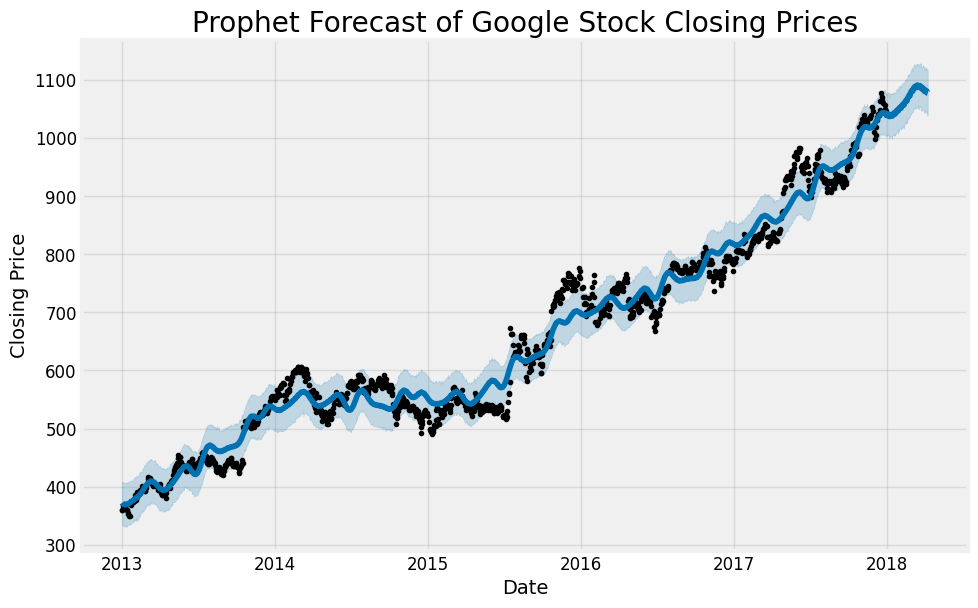

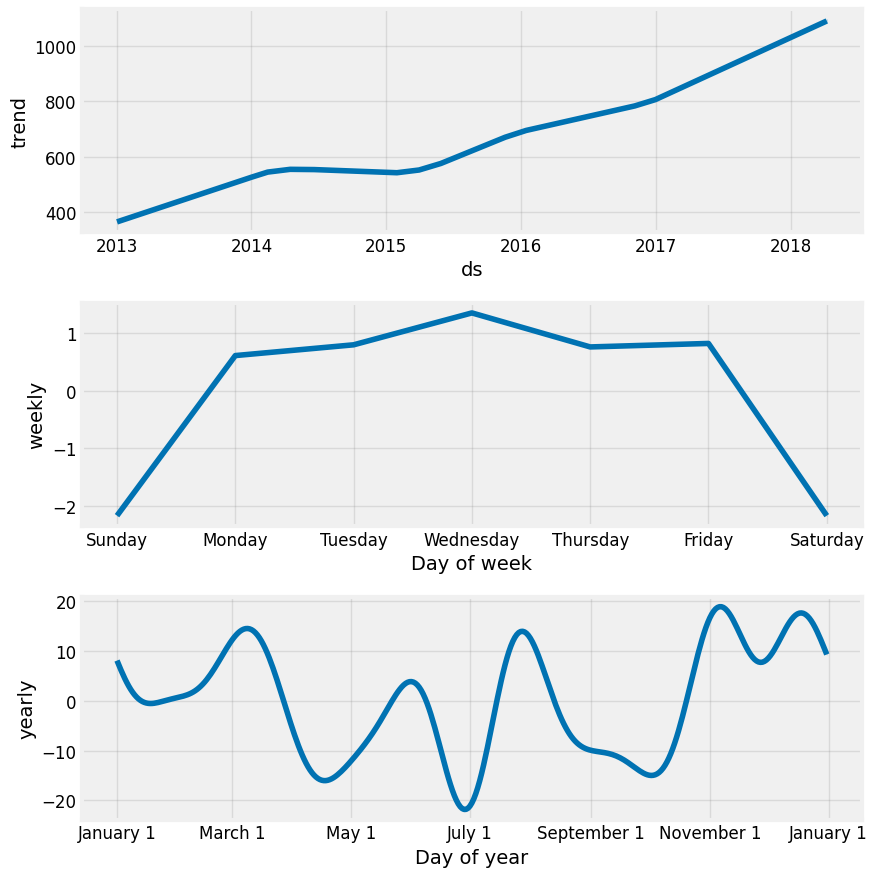

In [26]:
import matplotlib.pyplot as plt

# Plot the forecast
fig1 = model.plot(forecast)
plt.title('Prophet Forecast of Google Stock Closing Prices')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.show()

# Plot the forecast components
fig2 = model.plot_components(forecast)
plt.show()
